<a href="https://colab.research.google.com/github/andrew-ryabchenko/DS-Unit-2-Linear-Models/blob/master/Unit_2_Sprint_One_Linear_Models_(Nicholas_Lecture).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# 1. Wrangle Data

# 1.1 Import Data

In [ ]:
import pandas as pd

dtype_dict = {'ZIP_CODE': 'object', 'SALE_PRICE': float}

df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv', 
                 parse_dates=['SALE_DATE'],
                 index_col='SALE_DATE',
                 na_values=0.0,
                 dtype=dtype_dict)

## 1.2 EDA

In [ ]:
df.head()

,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,,,,,
2019-01-03,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013.0,1840.0,1909.0,2800000
2019-01-07,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004.0,1759.0,NaN,2650000
2019-01-09,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004.0,1190.0,2005.0,1005000
2019-01-10,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,NaN,1088.0,2006.0,1678000
2019-01-11,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280.0,873.0,NaN,1380000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2019-01-03 to 2019-04-30
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NEIGHBORHOOD             90 non-null     object 
 1   BUILDING_CLASS_CATEGORY  90 non-null     object 
 2   ADDRESS                  90 non-null     object 
 3   APARTMENT_NUMBER         90 non-null     object 
 4   ZIP_CODE                 86 non-null     object 
 5   GROSS_SQUARE_FEET        90 non-null     float64
 6   YEAR_BUILT               72 non-null     float64
 7   SALE_PRICE               90 non-null     int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 6.3+ KB


**Our Focus:** Is the relationship between sq footage and price

In [ ]:
import matplotlib.pyplot as plt

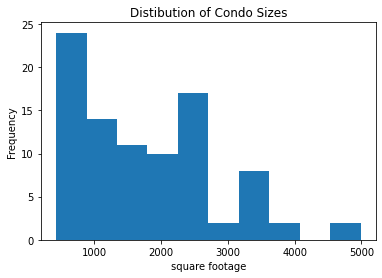

In [ ]:
df['GROSS_SQUARE_FEET'].plot(kind='hist')
plt.xlabel('square footage')
plt.title('Distibution of Condo Sizes');

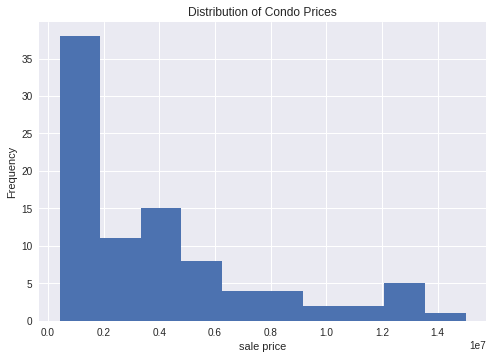

In [ ]:
plt.style.use('seaborn')
df['SALE_PRICE'].plot(kind='hist')
plt.xlabel('sale price')
plt.title('Distribution of Condo Prices');

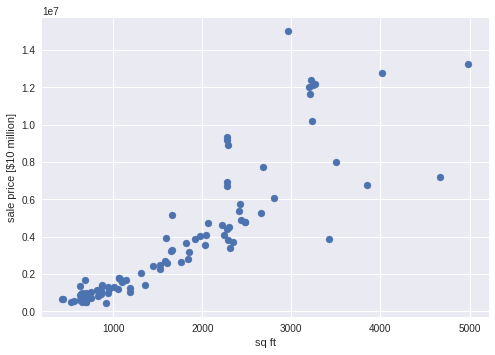

In [ ]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.xlabel('sq ft')
plt.ylabel('sale price [$10 million]');

# Interlude: What is a predictive model?

Is a way to create an mathmatical equation that describes the relationship between *sq footage* and *sale price*.

Based on the first row of our data set, we create a **function** that takes `'GROSS_SQUARE_FEET'` as input and returns an estimate of `'SALE_PRICE'`.

In [ ]:
def price_predictor(sqft):
  # What's the equation that takes `sqft` and turns it into `sale_price`?
  sale_price = sqft * 1521
  return sale_price

Next, we use the `apply` method to generate predictions for the entire dataset.

In [ ]:
df['EST_PRICE'] = df['GROSS_SQUARE_FEET'].apply(price_predictor)

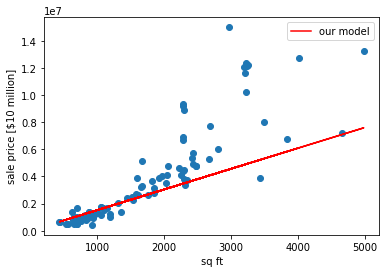

In [ ]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], df['EST_PRICE'], color='r', label='our model')
plt.legend()
plt.xlabel('sq ft')
plt.ylabel('sale price [$10 million]');

Then we look calculate the **absolute** difference between the true values for `'SALE_PRICE'` and our predictions.

In [ ]:
df['ERROR'] = abs(df['SALE_PRICE'] - df['EST_PRICE'])

In [ ]:
df[['GROSS_SQUARE_FEET','EST_PRICE', 'SALE_PRICE', 'ERROR']].head(5)

,GROSS_SQUARE_FEET,EST_PRICE,SALE_PRICE,ERROR
SALE_DATE,,,,
2019-01-03,1840.0,2798640.0,2800000,1360.0
2019-01-07,1759.0,2675439.0,2650000,25439.0
2019-01-09,1190.0,1809990.0,1005000,804990.0
2019-01-10,1088.0,1654848.0,1678000,23152.0
2019-01-11,873.0,1327833.0,1380000,52167.0


Finally, we take the mean of those errors to calculate the metric **MEAN ABSOLUTE ERROR**.

In [ ]:
df['ERROR'].mean()

1502401.6333333333

# 2. Split Data

## 2.1. Split our **target vector** from our **feature matrix**.

In [ ]:
import numpy as np

In [ ]:
#Target Vector
target = 'SALE_PRICE'
y = np.array(df[target])

#Feature Matrix
X = np.array(df[['GROSS_SQUARE_FEET']])

In [ ]:
# Your `y` should be one-dimentional
y.shape

(90,)

In [ ]:
# Your `X` should be two-dimentional
X.shape

(90, 1)

# 3. Establish a Baseline

Since this is a **regression** problem, we need to calculate what the **mean absolute error** would be is we only predicted the mean `'SALE_PRICE'`.

In [ ]:
y.mean()

3928736.3666666667

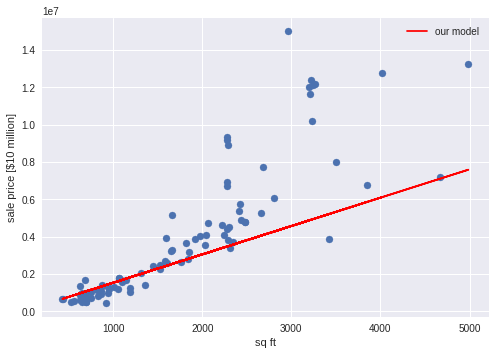

In [ ]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], df['EST_PRICE'], color='r', label='our model')
plt.legend()
plt.xlabel('sq ft')
plt.ylabel('sale price [$10 million]');

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print('BASELINE MAE:', mean_absolute_error(y, [y.mean()]*len(y)))

BASELINE MAE: 2783380.1977777784


# 4. Build Model

In [ ]:
# Step 1: Import your predictor
from sklearn.linear_model import LinearRegression

In [ ]:
# Step 2: Instantiate your predictor
model = LinearRegression()

In [ ]:
# Step 3: Train your model with the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Step 4: Predict
y_pred = model.predict(X)

# 5. Check Metrics

In [ ]:
print('TRAINING MAE:', mean_absolute_error(y, y_pred))

TRAINING MAE: 1176817.9930150746


# 6. Interpreting Model

In [ ]:
model.coef_

array([3076.44765542])

In [ ]:
model.intercept_

-1505364.0408585514

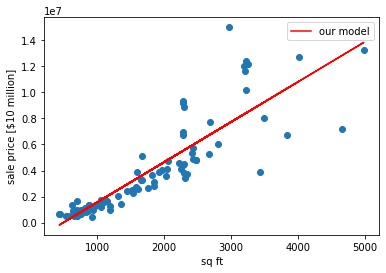

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='r', label='our model')
plt.legend()
plt.xlabel('sq ft')
plt.ylabel('sale price [$10 million]');